In [ ]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import random

ROBOTS_NUM = 12
AREA_W = 40.0
points = -0.5*AREA_W + AREA_W * np.random.rand(ROBOTS_NUM, 2)
print(f"Points shape: {points.shape}")

# mirror points across each edge of the env
dummy_points = np.zeros((5*ROBOTS_NUM, 2))
dummy_points[:ROBOTS_NUM, :] = points

Points shape: (12, 2)


In [ ]:
def mirror(points):
    mirrored_points = []

    # Define the corners of the square
    square_corners = [(-0.5*AREA_W, -0.5*AREA_W), (0.5*AREA_W, -0.5*AREA_W), (0.5*AREA_W, 0.5*AREA_W), (-0.5*AREA_W, 0.5*AREA_W)]

    # Mirror points across each edge of the square
    for edge_start, edge_end in zip(square_corners, square_corners[1:] + [square_corners[0]]):
        edge_vector = (edge_end[0] - edge_start[0], edge_end[1] - edge_start[1])

        for point in points:
            # Calculate the vector from the edge start to the point
            point_vector = (point[0] - edge_start[0], point[1] - edge_start[1])

            # Calculate the mirrored point by reflecting across the edge
            mirrored_vector = (point_vector[0] - 2 * (point_vector[0] * edge_vector[0] + point_vector[1] * edge_vector[1]) / (edge_vector[0]**2 + edge_vector[1]**2) * edge_vector[0],
                               point_vector[1] - 2 * (point_vector[0] * edge_vector[0] + point_vector[1] * edge_vector[1]) / (edge_vector[0]**2 + edge_vector[1]**2) * edge_vector[1])

            # Translate the mirrored vector back to the absolute coordinates
            mirrored_point = (edge_start[0] + mirrored_vector[0], edge_start[1] + mirrored_vector[1])

            # Add the mirrored point to the result list
            mirrored_points.append(mirrored_point)

    return mirrored_points

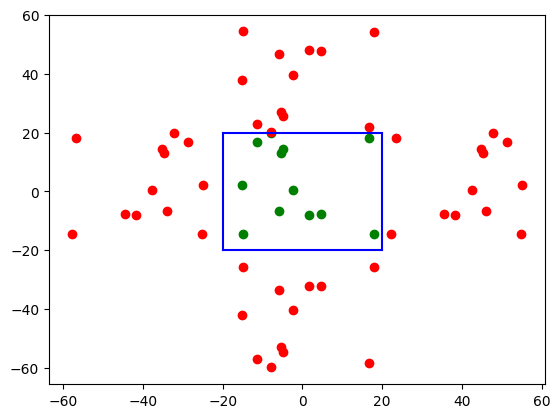

In [ ]:
mirrored_points = mirror(points)
mir_pts = np.array(mirrored_points)
plt.scatter(points[:, 0], points[:, 1], c='g')
plt.scatter(mir_pts[:, 0], mir_pts[:, 1], c='r')

# plot environment edges
plt.plot([-0.5*AREA_W, 0.5*AREA_W], [-0.5*AREA_W, -0.5*AREA_W], c='b')
plt.plot([0.5*AREA_W, 0.5*AREA_W], [-0.5*AREA_W, 0.5*AREA_W], c='b')
plt.plot([0.5*AREA_W, -0.5*AREA_W], [0.5*AREA_W, 0.5*AREA_W], c='b')
plt.plot([-0.5*AREA_W, -0.5*AREA_W], [0.5*AREA_W, -0.5*AREA_W], c='b')

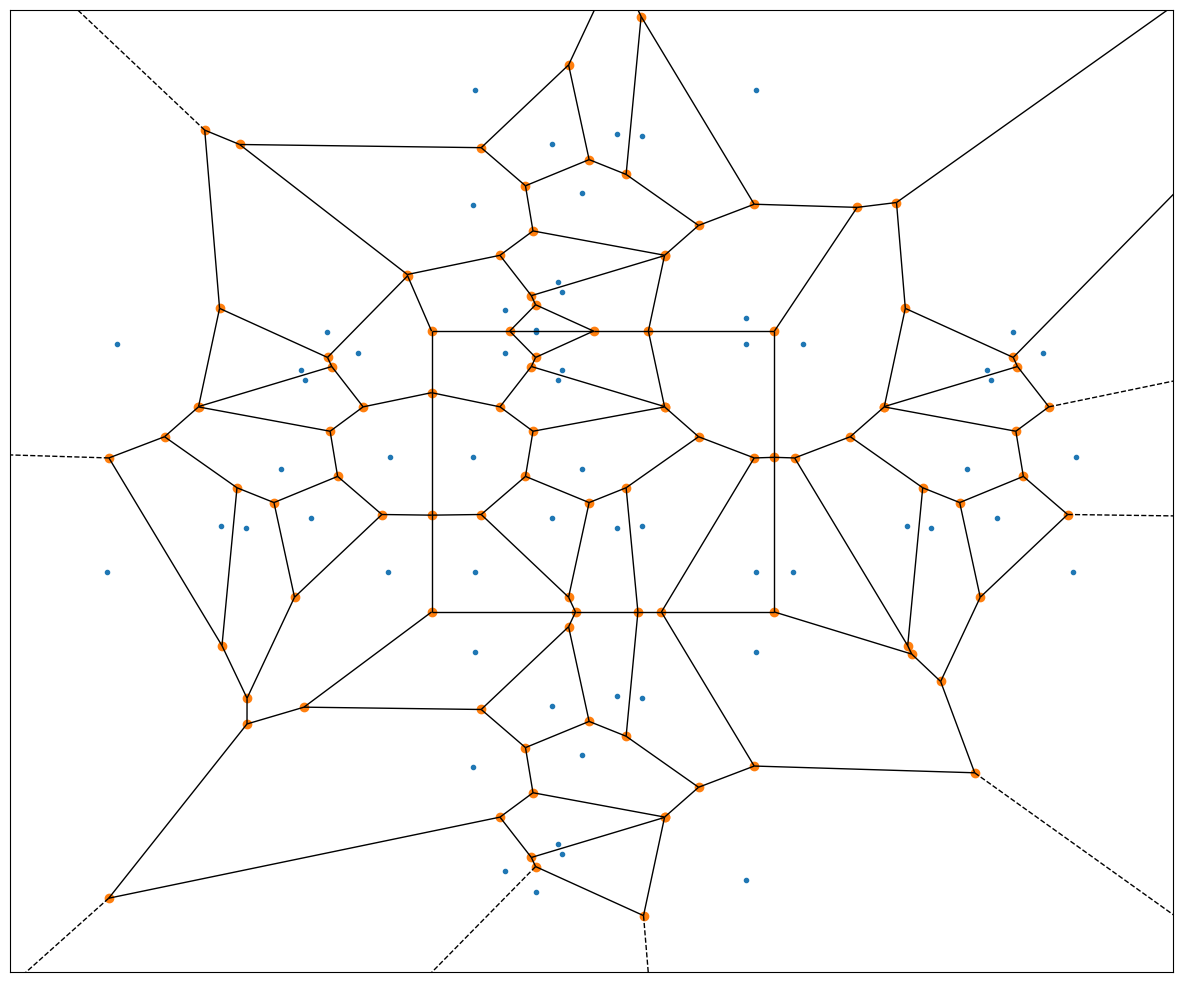

In [ ]:
dummy_points[ROBOTS_NUM:, :] = mir_pts

vor = Voronoi(dummy_points)

# print("Vertices:")
# print(vor.vertices)
# print("Regions:")
# print(vor.regions)
# print("Ridge points:")
# print(vor.ridge_points)



fig = voronoi_plot_2d(vor)
fig.set_size_inches(15.0,12.5)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

In [ ]:
vor.point_region

array([25, 16, 24, 28, 17, 27, 20, 60, 29, 26, 34, 54, 33, 11,  5,  4,  6,
        3,  7, 57, 30, 32, 31, 53,  1, 18, 51, 47, 22, 50, 23,  2, 49, 21,
       48, 10, 45, 19, 13, 14, 12, 42, 46,  8,  9, 41, 43, 44, 59, 40, 35,
       38, 37, 36, 15, 55, 39, 58, 56, 52])

False
False
False
False
False
True
False
False
False
False
False
False


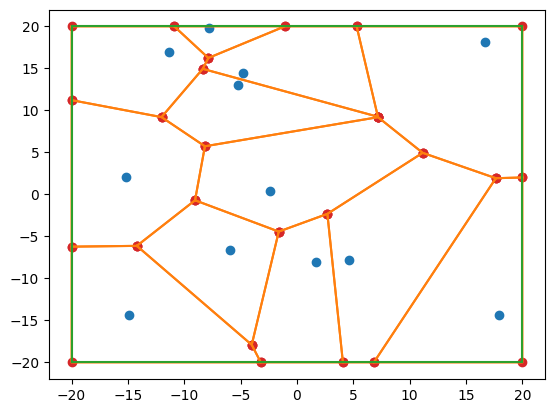

In [ ]:
from shapely import Polygon, Point

for idx in range(ROBOTS_NUM):
  region = vor.point_region[idx]
  plt.scatter(vor.points[idx, 0], vor.points[idx, 1], c='tab:blue')
  poly_vert = []
  for vert in vor.regions[region]:
    v = vor.vertices[vert]
    poly_vert.append(v)
    plt.scatter(v[0], v[1], c='tab:red')

  poly = Polygon(poly_vert)
  x,y = poly.exterior.xy
  plt.plot(x, y, c='tab:orange')
  pt = Point(0.0, 0.0)
  print(poly.contains(pt))

# plt.scatter(vor.vertices)
plt.plot([-0.5*AREA_W, 0.5*AREA_W], [-0.5*AREA_W, -0.5*AREA_W], c='tab:green')
plt.plot([0.5*AREA_W, 0.5*AREA_W], [-0.5*AREA_W, 0.5*AREA_W], c='tab:green')
plt.plot([0.5*AREA_W, -0.5*AREA_W], [0.5*AREA_W, 0.5*AREA_W], c='tab:green')
plt.plot([-0.5*AREA_W, -0.5*AREA_W], [0.5*AREA_W, -0.5*AREA_W], c='tab:green')

(-10.568225326720722, 8.024959411917179, 8.714905558185512, 20.537385449610213)

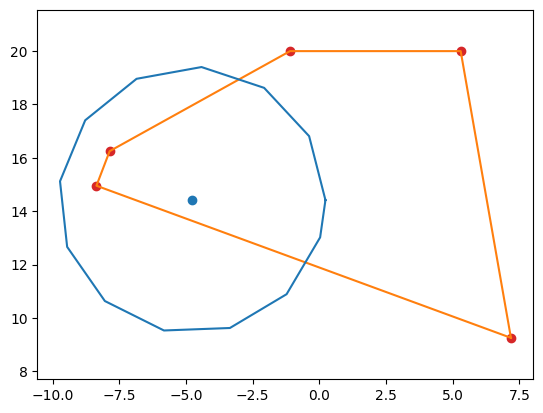

In [ ]:
idx = 0
region = vor.point_region[idx]
# plt.scatter(vor.points[idx, 0], vor.points[idx, 1], c='tab:blue')
poly_vert = []
for vert in vor.regions[region]:
  v = vor.vertices[vert]
  poly_vert.append(v)
  plt.scatter(v[0], v[1], c='tab:red')

poly = Polygon(poly_vert)
x,y = poly.exterior.xy
plt.plot(x, y, c='tab:orange')
# robot = np.array([-18.0, -12.0])
robot = vor.points[idx]
plt.scatter(robot[0], robot[1])

# Intersect with robot range
ROBOT_RANGE = 5.0
step = 0.5
range_pts = []
for th in np.arange(0.0, 2*np.pi, step):
  xi = robot[0] + ROBOT_RANGE * np.cos(th)
  yi = robot[1] + ROBOT_RANGE * np.sin(th)
  pt = Point(xi, yi)
  range_pts.append(pt)
  # plt.plot(xi, yi, c='tab:blue')

range_poly = Polygon(range_pts)
xc, yc = range_poly.exterior.xy
plt.plot(xc, yc, c='tab:blue')

plt.axis('equal')


(-8.786413524938226, 0.6560864619890119, 11.737522534583315, 19.27993068743299)

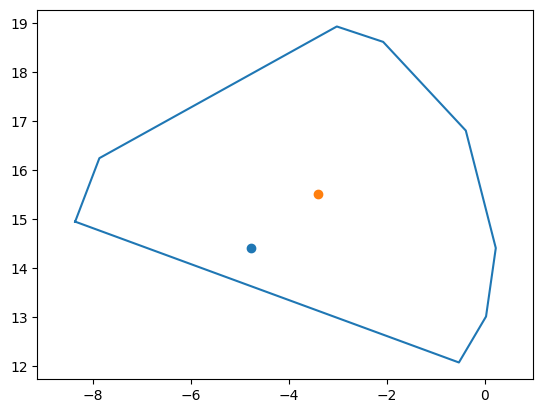

In [ ]:
from shapely import intersection

lim_region = intersection(poly, range_poly)
xl, yl = lim_region.exterior.xy
plt.plot(xl, yl, c='tab:blue')
plt.scatter(robot[0], robot[1])
plt.scatter(lim_region.centroid.x, lim_region.centroid.y)
plt.axis('equal')

In [ ]:
p1 = np.array([0.0, 0.0])
p2 = np.array([1.0, 1.0])
dist = np.linalg.norm(p1-p2)
print(f"Distance: {dist}")

Distance: 1.4142135623730951


In [ ]:
centr = np.array([lim_region.centroid.x, lim_region.centroid.y])
dist = np.linalg.norm(robot-centr)
print(f"Distance to centroid: {dist}")

Distance to centroid: 1.759404083330377
